# Task 2 - Dimensionality Reduction (33 points)

**Task Definition:** A video game company has been working on creating quests for their new video game, but they did not document their decisions well and cannot tell  how many different quests they agreed on. They ask you to look into the data to find out how many different types of quests they created. For this you need to use different dimensionality reduction techniques.

**Input:** The provided input file (`quest_data.txt`) contains the data about the quests. Each line in the file corresponds to a quest and has the following features:

- Estimated length (minutes)
- Number of NPCs to interact with
- Number of resources to collect
- Number of special items the user could find
- Experience points to earn
- Coordinates of the NPC giving the quest (X, Y)

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns

## 2.1 Getting to know the data (6 points)

**Task:** Load the dataset to a pandas DataFrame and display the pairwise relationship of the features using seaborn. (3 points)

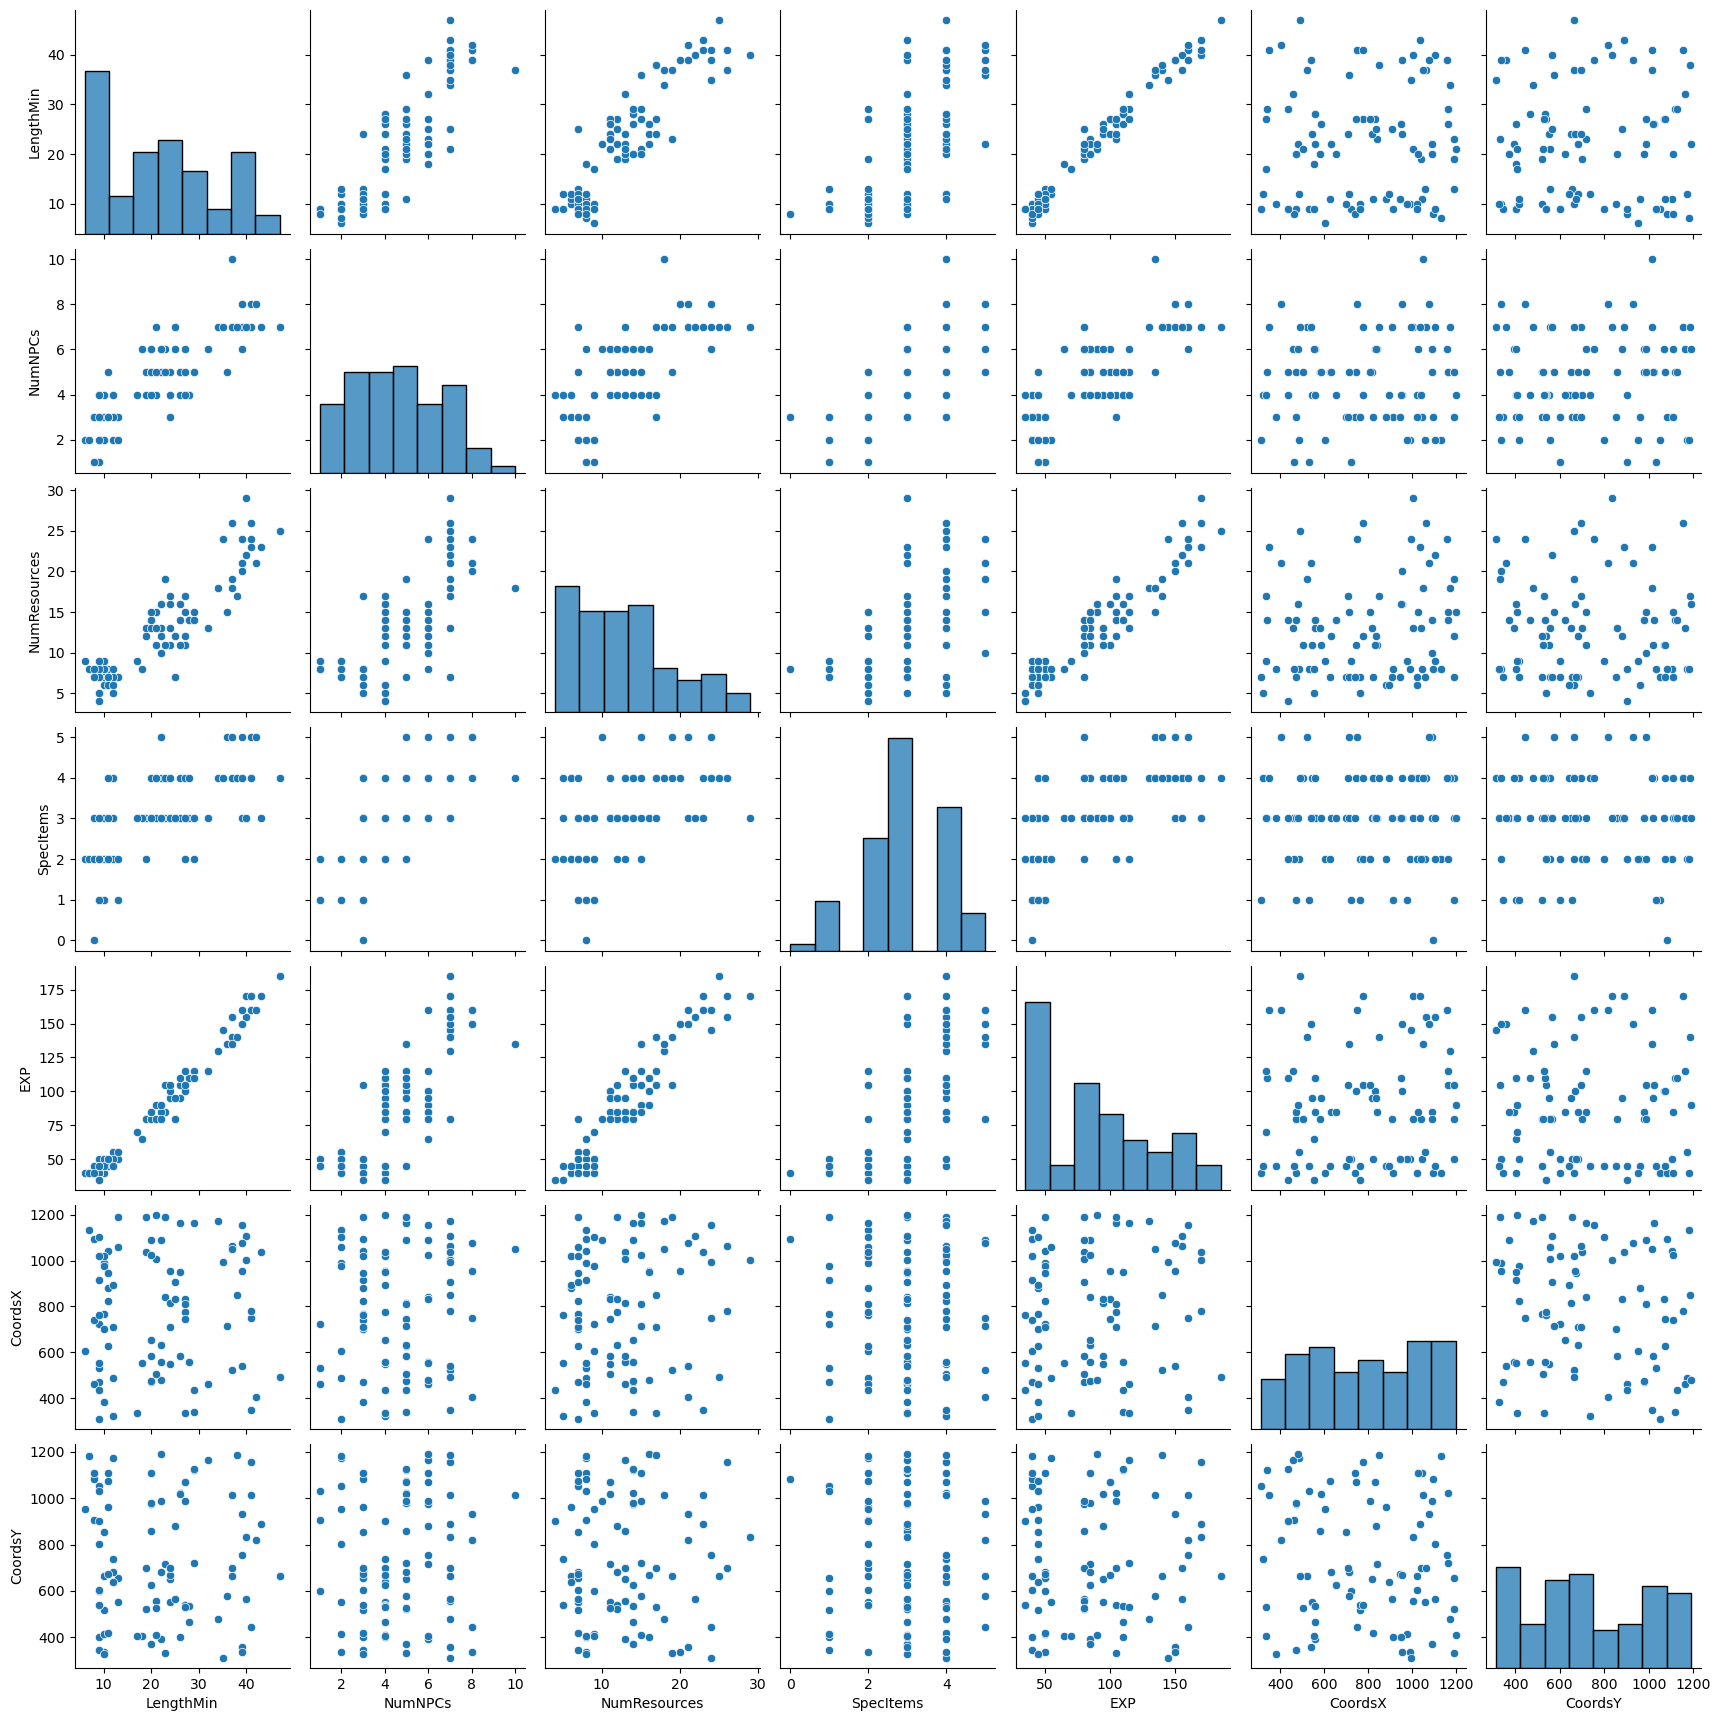

In [2]:
data = pd.read_csv("quest_data.csv")
sns.pairplot(data)
plt.show()

**Report:** Based on the pairplot answer the following questions: (3 points)
-- Do you recognize any data distribution? (e.g. Gaussian, uniform)
-- Are there any correlated feature pairs?
-- Is selecting some features sufficient for finding (well separable) clusters in the data?

Estimated length (minutes): Bimodal Distribution<br>
Number of NPCs to interact with: Gaussian Distribution<br>
Number of resources to collect: Right-skewed Distribution<br>
Number of special items the user could find: Gaussian Distribution<br>
Experience points to earn: Exponential Distribution<br>
Coordinates of the NPC giving the quest (X, Y): Uniform Distribution<br>

'Estimated length' - 'Number of NPCs to interact with' exhibit a positive correlation. <br>
'Estimated length' - 'Number of resources to collect' exhibit a positive correlation.<br>
'Estimated length' - 'Number of special items the user could find' is a correlated feature pair.<br>
'Estimated length' - 'Experience points to earn' exhibit a linear relationship. (positive correlation)<br>
'Number of NPCs to interact with' - 'Number of resources to collect' exhibit a positive correlation.<br>
'Number of NPCs to interact with' - 'Number of special items the user could find' is a correlated feature pair.<br>
'Number of NPCs to interact with' - 'Experience points to earn' exhibit a linear relationship. (positive correlation)<br>
'Number of resources to collect' - 'Number of special items the user could find' is a correlated feature pair.<br>
'Number of resources to collect' - 'Experience points to earn' exhibit a linear relationship. (positive correlation)<br>
'Number of special items the user could find' - 'Experience points to earn' is a correlated feature pair.<br>
'Number of special items the user could find' - 'Coordinates of the NPC giving the quest (X, Y)' is a correlated feature pair.<br>
'Coordinates of the NPC giving the quest (X, Y)' - 'Number of NPCs to interact with' is a correlated feature pair.<br>

Estimated length and Number of resources to collect are  features sufficient for finding (well separable) clusters in the data.

## 2.2 Preprocessing and PCA (21 points)

**Task:** In this task you will experience that preprocessing the dataset before using PCA could lead to results better for clustering. Create the following versions:

1) Apply PCA on the original dataset without preprocessing. (2 points)
2) Scale the data using an appropriate scaler and apply PCA on the scaled data. (4 points)
3) Remove noise features from the data (e.g. features with uniform distribution), scale the reduced dataset and apply PCA on the scaled data. (6 points)

For each version create a scatter plot using the principal components and print out the explained variance. (3 points)

**Hint:** You can use the PCA implementation from sklearn.decomposition and an appropriate scaler from sklearn.preprocessing.

LengthMin         125.805868
NumNPCs             3.587516
NumResources       34.858427
SpecItems           1.190512
EXP              1742.724719
CoordsX         70319.332834
CoordsY         71375.689888
dtype: float64


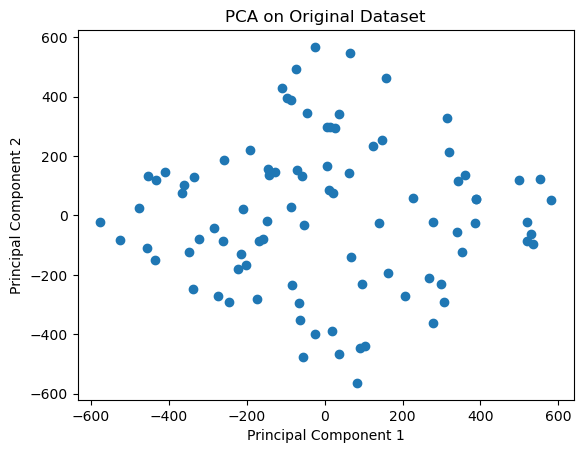

Explained Variance (Original): [5.57360743e-01 4.29430116e-01 1.31563619e-02 3.75604393e-05
 1.04256176e-05 3.96286376e-06 8.30315526e-07]


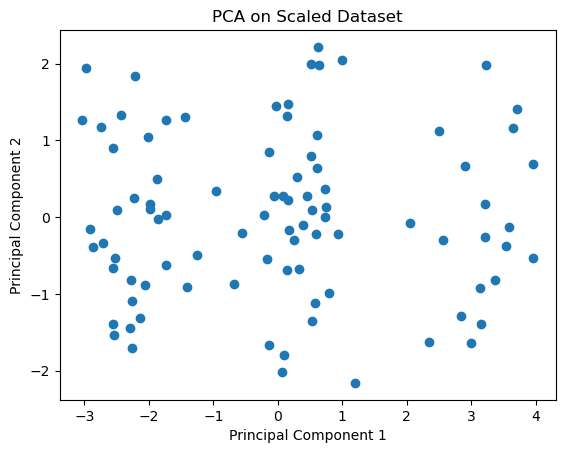

Explained Variance (Scaled): [5.90867878e-01 1.61748638e-01 1.28630933e-01 7.33998309e-02
 3.43716851e-02 1.08686857e-02 1.12349814e-04]


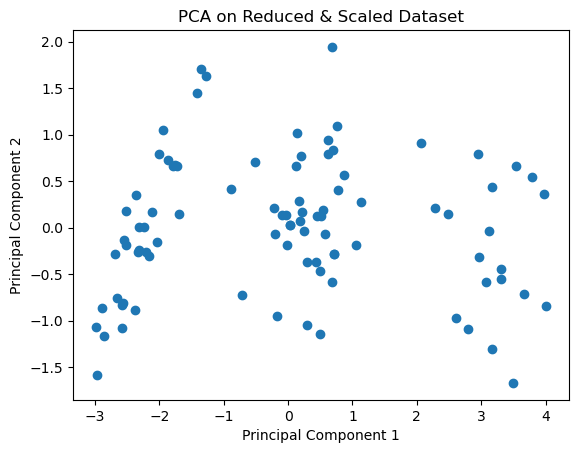

Explained Variance (Reduced): [8.25769487e-01 1.07981795e-01 4.98621275e-02 1.62237817e-02
 1.62808757e-04]


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

variance = data.var()
print(variance)

#PCA on the original dataset without preprocessing
pca_original = PCA()
principal_components_original = pca_original.fit_transform(data)
variance_ratio_original = pca_original.explained_variance_ratio_

plt.scatter(principal_components_original[:, 0], principal_components_original[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Original Dataset')
plt.show()

print("Explained Variance (Original):", variance_ratio_original)

#scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#apply PCA to scaled data
pca_scaled = PCA()
principal_components_scaled = pca_scaled.fit_transform(data_scaled)
variance_ratio_scaled = pca_scaled.explained_variance_ratio_

plt.scatter(principal_components_scaled[:, 0], principal_components_scaled[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Scaled Dataset')
plt.show()

print("Explained Variance (Scaled):", variance_ratio_scaled)

#remove noise features with uniform distribution
variances = np.var(data, axis=0)
threshold = 2000
reduced_features = data.columns[variances < threshold]
data_reduced = data[reduced_features]

#scale the reduced dataset
scaler_reduced = StandardScaler()
data_reduced_scaled = scaler_reduced.fit_transform(data_reduced)

#apply PCA on reduced and scaled data
pca_reduced = PCA()
principal_components_reduced = pca_reduced.fit_transform(data_reduced_scaled)
variance_ratio_reduced = pca_reduced.explained_variance_ratio_

plt.scatter(principal_components_reduced[:, 0], principal_components_reduced[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Reduced & Scaled Dataset')
plt.show()

print("Explained Variance (Reduced):", variance_ratio_reduced)


**Report:** Based on your experiments and knowledge from the lectures, explain why you get better or worse results when scaling and removing noise features from this dataset. (6 points)

**Hint:** You could consider the general goal of PCA, the explained variance, or compare the variance of the features (e.g. with the var() method of pandas DataFrames).

Scaling features helps to ensure equal weighting of features so that features with larger variances does not dominate the principal components. Scaling also helps with th interpretability of the principal components and it can lead to a better representaion. However, the usage of inappropriate scaling methods can distort the original relationships which would give inaccurate results and features with larger variances can overshadow features with smaller variances. In that case, applying PCA would worsen instead of improving the situation. We should be careful to preserve the fundamental structure of the data and should consider scaling methods that are aligned with the characteristics of the variables so that our features are meaningful to the principal components.

Removing noise features before PCA helps to get rid of irrelevant variables and helps to focus on higher-variance features. We are not interested in uninformative or random features because they can lead to irrelevant and less interpretable principal components. However, if we make a mistake and remove a relevant feature, it will lead to a worse outcome. Removing important features mean discarding valuable information and we should be careful not to alter the essential structure of the data. We should make sure to assess carefully before deciding to remove a feature. Noise features mostly have low variances and contribute little to overall variance in the data.

In this case, the features that have too high variances were removed, as they are irrelevant to the overall variance.

## 2.3 Non-Negative Matrix Factorization (6 points)

**Task:** Apply NMF on the data based on your experience from Task 2.2. Create a scatter plot of the solutions. (6 points)

**Hint:** You can use the NMF implementation from sklearn.decomposition. What properties need the dataset have to apply NMF on it? Transform the data by using an appropriate scaler from sklearn.preprocessing.

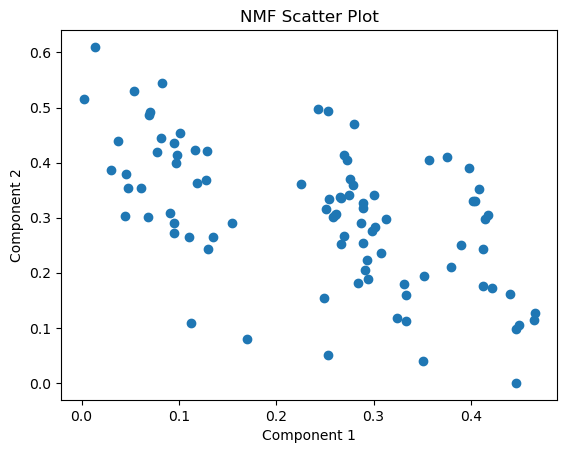

In [4]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

data_transformed = np.log1p(data)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_transformed)

#logarithmic transformation and MinMaxScaler is used to ensure the data has no negative values and scale the transformed data

#apply NMF on the scaled data
nmf = NMF(n_components=2)
components = nmf.fit_transform(data_scaled)

plt.scatter(components[:, 0], components[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Scatter Plot')
plt.show()

The usage of NMF is limited to data with non-negative values. If the relationships between features are highly non-linear, it may not be appropiate to use NMF. NMF can be computationally expensive and may not be scalable to extremely large datasets or very high-dimensional data. NMF is inclined to overfit the data if it contains noise or outliers. 

credits for general information;

https://medium.com/ <br>
https://towardsdatascience.com/<br>
https://statisticsbyjim.com/<br>